## Task 3 - Model Explainability using SHAP

### 1. Load model and data
- Load the best model (RF)
- Load or prepare X_test

### 2. Initialize SHAP Explainer
- Use `shap.Explainer(...)` or `TreeExplainer(...)`

### 3. Compute SHAP values
- Use a sample from X_test for speed

### 4. Visualize
- Summary Plot (global feature importance)
- Bar Plot (feature ranking)
- Force Plot (local explanation)

### 5. Interpretation
- Write markdown to explain what each plot shows
- Discuss key features driving fraud predictions

### 6. Save Plots
- Save as PNGs for use in final PDF or slides


In [1]:
import os
import sys

# Change to project root
os.chdir("..")  #

sys.path.append("src")

from load_datas import load_data

# Load the data
X_train_resampled, y_train, X_test, y_test = load_data()


In [2]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt


c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load trained model
model = joblib.load("models/random_forest_model.pkl")  


c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_beeswarm.py:733: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim((slow, shigh))
c:\Users\arsem\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_beeswarm.py:753: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim((slow, shigh))


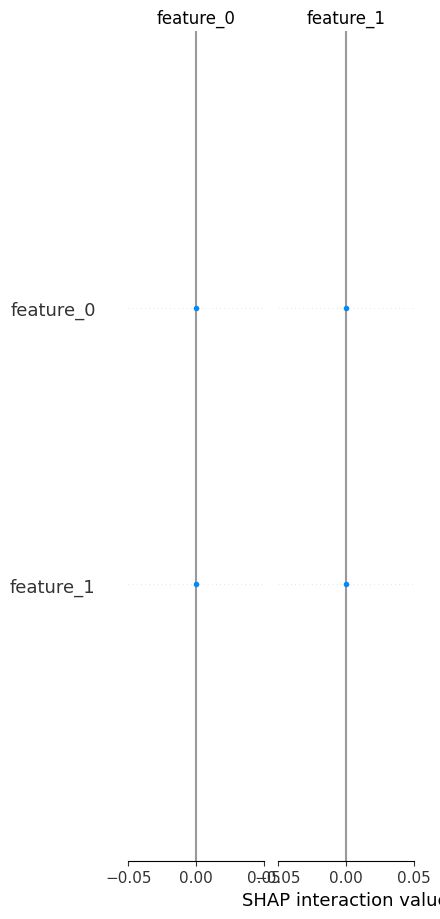

In [4]:
X_sample_sparse = X_test[:1]
X_sample_array = X_sample_sparse.toarray()
feature_names = [f"feature_{i}" for i in range(X_sample_array.shape[1])]
X_sample_df = pd.DataFrame(X_sample_array, columns=feature_names)

explainer = shap.Explainer(model, X_sample_df)
shap_values = explainer(X_sample_df)
shap.summary_plot(shap_values, X_sample_df, max_display=10)


In [5]:
print(X_test.shape)

(30223, 111611)


In [11]:
print(type(X_sample_sparse))
print(X_sample_sparse.dtype)

<class 'scipy.sparse._csr.csr_matrix'>
float64


In [ ]:
# Select multiple samples from the sparse matrix
X_sample_sparse = X_test[:5]  # Change to 5 samples
X_sample_array = X_sample_sparse.toarray()

# Create feature names
feature_names = [f"feature_{i}" for i in range(X_sample_array.shape[1])]

# Create a DataFrame for the samples
X_sample_df = pd.DataFrame(X_sample_array, columns=feature_names)

# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_sample_df)

# Calculate SHAP values for the selected samples
shap_values = explainer(X_sample_df)

# Create the summary plot
shap.summary_plot(shap_values, X_sample_df, max_display=10)

## SHAP (SHapley Additive exPlanations):
 plots provide insights into model predictions by illustrating the contribution of each feature to the output. Random SHAP plots can be used to visualize a diverse set of samples, showcasing how different features impact predictions across various instances.

### Feature Importance: 
Each plot highlights which features are most influential in driving the model's predictions, allowing stakeholders to understand the model's decision-making process.

### Distribution of SHAP Values: 
The plots typically display the distribution of SHAP values for selected features, illustrating how positive and negative contributions vary among different predictions.

### Global vs. Local Interpretability: 
While some plots may focus on individual predictions (local interpretability), others aggregate information to provide a broader view of feature impacts across the dataset (global interpretability).

### Identifying Patterns: 
By examining multiple random SHAP plots, users can identify patterns and trends, aiding in model validation and refinement.